In [27]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

df = pd.read_csv('/home/marcus-vinicius/Desktop/Python/atvfacul/estqinfo.csv')

In [28]:
df

,Dia,Total de Acessos,Total de Acesso Bem - Sucedidos,Proporção de Acessos Bem - Sucedidos (%),Operações de Atualizações de Estoque,Proporção de Operações com Erros,Produtos em Estoque(%)
0,1,105780,102324,"0,967",78000,"0,001","0,632"
1,2,108346,102161,"0,943",76450,"0,002","0,63"
2,3,107476,101409,"0,944",75500,"0,001","0,528"
3,4,109179,101069,"0,926",77000,"0,003","0,625"
4,5,108721,100018,"0,92",75500,"0,004","0,623"
5,6,107744,99670,"0,925",78000,"0,005","0,621"
6,7,106732,99510,"0,932",78500,"0,006","0,618"
7,8,107476,98781,"0,919",76000,"0,007","0,616"
8,9,107458,97873,"0,911",76500,"0,008","0,614"
9,10,108346,97006,"0,895",78000,"0,009","0,612"


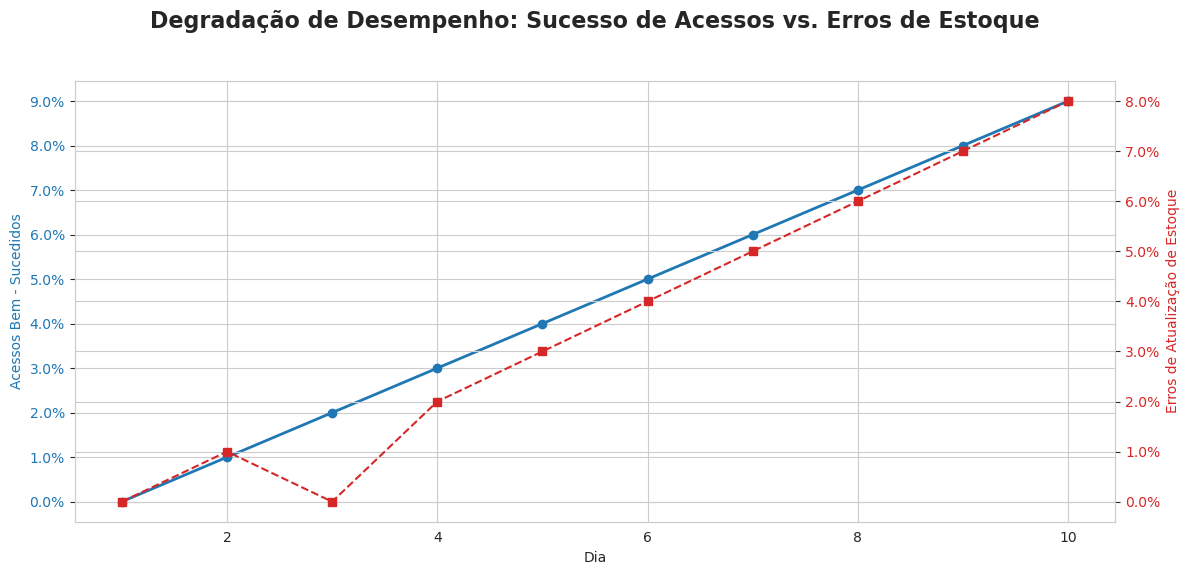

In [29]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Dia')
ax1.set_ylabel('Acessos Bem - Sucedidos', color=color)
ax1.plot(df['Dia'], df['Proporção de Acessos Bem - Sucedidos (%)'], marker='o', color=color, linewidth=2, label='Acessos Bem - Sucedidos')
ax1.tick_params(axis='y', labelcolor=color)
# O formatador abaixo mostra o float como porcentagem no eixo
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=100))

ax2 = ax1.twinx()  # Cria um segundo eixo Y
color = 'tab:red'
ax2.set_ylabel('Erros de Atualização de Estoque', color=color)
ax2.plot(df['Dia'], df['Proporção de Operações com Erros'], marker='s', color=color, linestyle='--', label='Erros de Estoque')
ax2.tick_params(axis='y', labelcolor=color)
# O formatador abaixo é crucial para mostrar o float como porcentagem no eixo
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=100))

# Adicionando Títulos
fig.suptitle('Degradação de Desempenho: Sucesso de Acessos vs. Erros de Estoque', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])



plt.show()

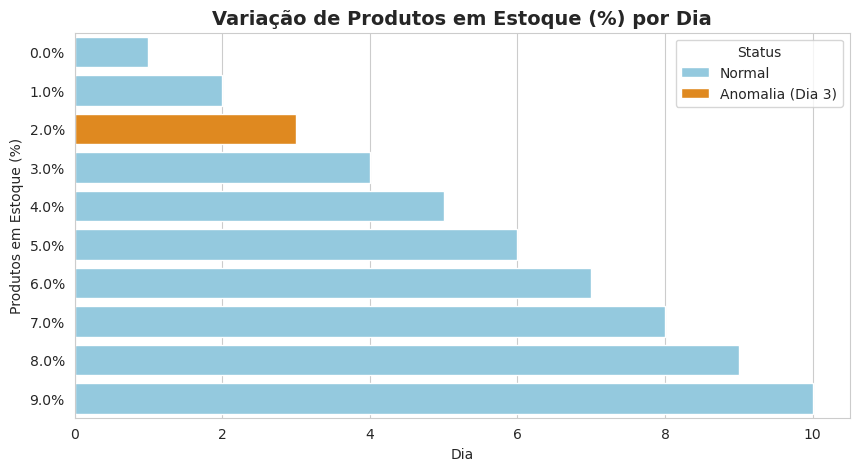

In [30]:
# Criando uma coluna
df['Destaque'] = df['Dia'].apply(lambda x: 'Anomalia (Dia 3)' if x == 3 else 'Normal')

plt.figure(figsize=(10, 5))

# Criando o gráfico de barras com Seaborn
sns.barplot(
    x='Dia',
    y='Produtos em Estoque(%)',
    data=df,
    hue='Destaque',
    palette={'Normal': 'skyblue', 'Anomalia (Dia 3)': 'darkorange'},
    dodge=False
)

# Configurando o formato para porcentagem
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))

plt.title('Variação de Produtos em Estoque (%) por Dia', fontsize=14, fontweight='bold')
plt.ylabel('Produtos em Estoque (%)')
plt.xlabel('Dia')
plt.legend(title='Status')
plt.show()